# Time interval (minuets) between past and present Geyser eruptions.    

## Step 1: Generating sample data

In [405]:
# Import Libraries
import pandas as pd
import numpy as np
import math
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns


In [406]:
# Set the seed
np.random.seed(20)

# Create arrays of random numbers for the recent and past intervals between eruptions
recent = np.random.randint(45, 110, 12)
past = np.random.randint(60, 99, 12)

# Convert the arrays to DataFrames with the column name "times"
recent_df = pd.DataFrame(recent, columns=['times'])
past_df = pd.DataFrame(past, columns=['times'])

# Print the DataFrame head
print('recent_df data\n')
print(recent_df.head(), '\n')
print('past_df data\n')
print(past_df.head())
 

recent_df data

   times
0     60
1     73
2     54
3     65
4     67 

past_df data

   times
0     97
1     94
2     66
3     86
4     73


## Step 2: Calculate Descriptive statistics

In [407]:
# Summary statistics for the recent and past eruption intervals
statistics_recent = recent_df[['times']].describe()
print('Summary Statistics for Recent Eruption Intervals\n')
print(statistics_recent, '\n')

statistics_past = past_df[['times']].describe()
print('Summary Statistics for Past Eruption Intervals\n')
print(statistics_past)

Summary Statistics for Recent Eruption Intervals

            times
count   12.000000
mean    69.583333
std     15.252173
min     52.000000
25%     60.750000
50%     66.000000
75%     74.500000
max    107.000000 

Summary Statistics for Past Eruption Intervals

           times
count  12.000000
mean   77.333333
std    10.898985
min    63.000000
25%    70.750000
50%    73.000000
75%    85.250000
max    97.000000


In [408]:
# Calculate the range of the recent eruption intervals
range_recent = np.ptp(recent_df)
print('Range of Recent Eruption Intervals:  ', range_recent, '\n')

# Calculate the range of the past eruption intervals
range_past = np.ptp(past_df)
print('Range of Past Eruption Intervals:  ', range_past, '\n')

# Calculate the interquartile range of the recent eruption intervals
iqr_recent = st.iqr(recent_df, rng=(25, 75))
print('Interquartile Range of Recent Eruption Intervals:  ', iqr_recent, '\n')

# Calculate the interquartile range of the past eruption intervals
iqr_past = st.iqr(past_df, rng=(25, 75))
print('Interquartile Range of Past Eruption Intervals:  ', iqr_past, '\n')

Range of Recent Eruption Intervals:   55 

Range of Past Eruption Intervals:   34 

Interquartile Range of Recent Eruption Intervals:   13.75 

Interquartile Range of Past Eruption Intervals:   14.5 



## Step 3: Create a visual of the data 

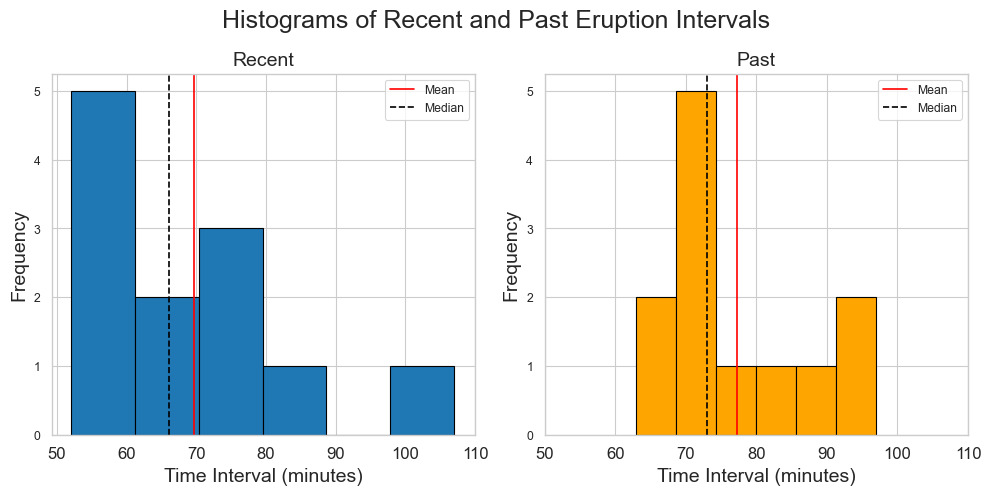

In [409]:
# Create side by side histograms of the recent and past eruption intervals sharing the same x-axis using matplotlib
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Histograms of Recent and Past Eruption Intervals', fontsize=18)

ax1 = fig.add_subplot(1, 2, 1)  
ax1.hist(recent_df['times'], bins=6, edgecolor='black')
ax1.set_ylabel('Frequency', fontsize=14)
ax1.set_title('Recent', fontsize=14)
ax1.set_xlabel('Time Interval (minutes)', fontsize=14)
ax1.axline((recent_df['times'].mean(), 0), (recent_df['times'].mean(), 5), color='red', linestyle='-')
ax1.axline((recent_df['times'].median(), 0), (recent_df['times'].median(), 5), color='black', linestyle='--')
ax1.set_xticks([50, 60, 70, 80, 90, 100, 110])
ax1.set_xticklabels([50, 60, 70, 80, 90, 100, 110], fontsize=12)
ax1.legend(['Mean', 'Median'])

ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(past_df['times'], bins=6, color='orange', edgecolor='black')
ax2.set_ylabel('Frequency', fontsize=14)
ax2.set_title('Past', fontsize=14)
ax2.set_xlabel('Time Interval (minutes)', fontsize=14)
ax2.axline((past_df['times'].mean(), 0), (past_df['times'].mean(), 5), color='red', linestyle='-')
ax2.axline((past_df['times'].median(), 0), (past_df['times'].median(), 5), color='black', linestyle='--')
ax2.set_xticks([50, 60, 70, 80, 90, 100, 110])
ax2.set_xticklabels([50, 60, 70, 80, 90, 100, 110], fontsize=12)
ax2.legend(['Mean', 'Median'])

plt.tight_layout()
plt.show()


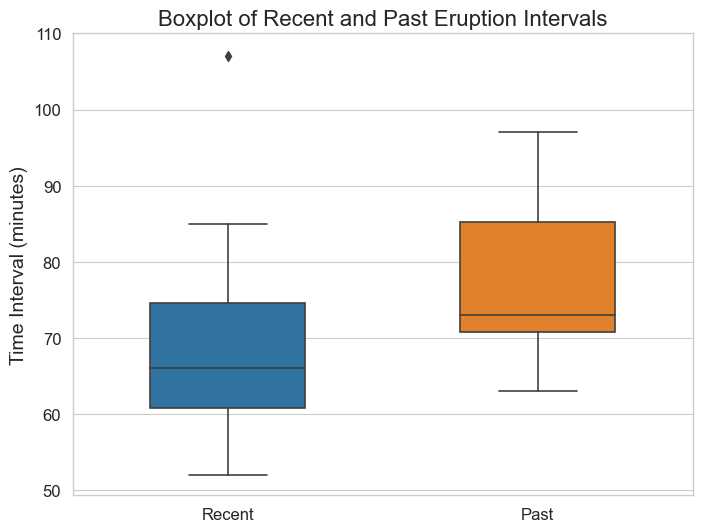

In [410]:
# Create a side by side vertical boxplot of the recent and past eruption intervals using seaborn and matplotlib
sns.set_style('whitegrid')
sns.set_context('paper')
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=[recent_df, past_df], ax=ax, orient='v', width=0.5)
ax.set_title('Boxplot of Recent and Past Eruption Intervals', fontsize=16)
ax.set_ylabel('Time Interval (minutes)', fontsize=14)
ax.set_xticklabels(['Recent', 'Past'], fontsize=12)
ax.set_yticks([50, 60, 70, 80, 90, 100, 110])
ax.set_yticklabels([50, 60, 70, 80, 90, 100, 110], fontsize=12)
plt.show()




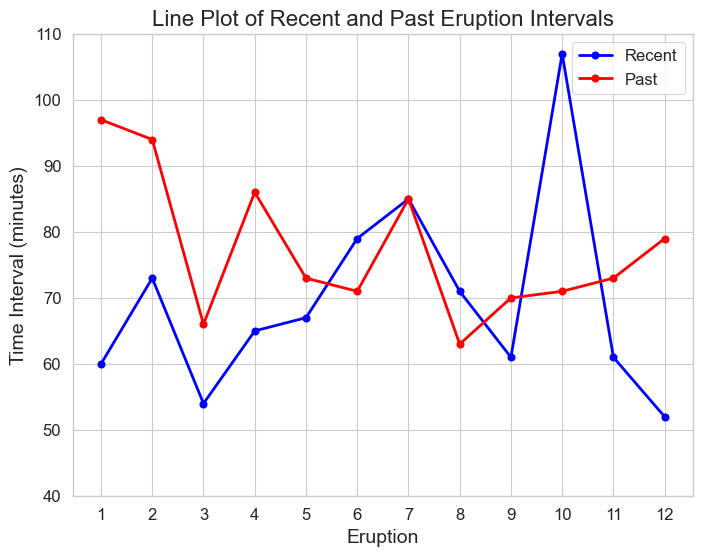

In [411]:
# Create a line plot of the recent and past eruption intervals
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(recent_df, color='blue', linewidth=2, label='Recent', marker='o')
ax.plot(past_df, color='red', linewidth=2, label='Past', marker='o')
ax.set_title('Line Plot of Recent and Past Eruption Intervals', fontsize=16)
ax.set_xlabel('Eruption', fontsize=14)
ax.set_ylabel('Time Interval (minutes)', fontsize=14)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], fontsize=12)
ax.set_yticks([40, 50, 60, 70, 80, 90, 100, 110])
ax.set_yticklabels([40, 50, 60, 70, 80, 90, 100, 110], fontsize=12)
ax.legend(loc='upper right', fontsize=12)
plt.show()


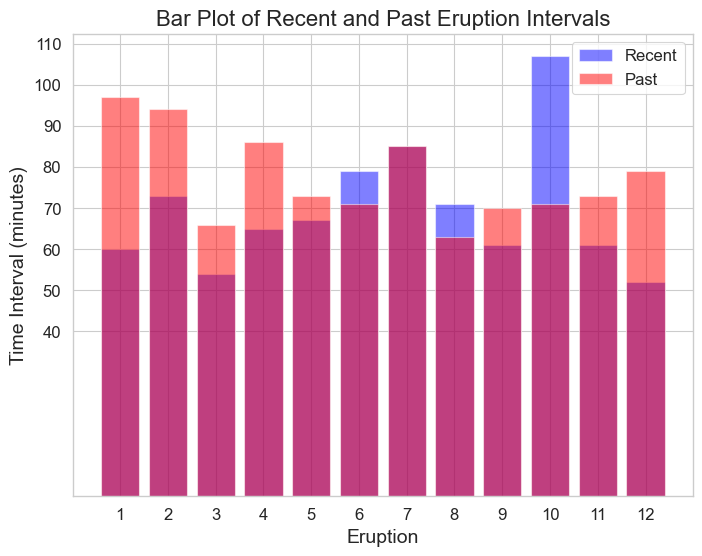

In [412]:
# Create a bar plot of the recent and past eruption intervals
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x=recent_df.index, height=recent_df['times'], color='blue', label='Recent', alpha=0.5)
ax.bar(x=past_df.index, height=past_df['times'], color='red', label='Past', alpha=0.5)
ax.set_title('Bar Plot of Recent and Past Eruption Intervals', fontsize=16)
ax.set_xlabel('Eruption', fontsize=14)
ax.set_ylabel('Time Interval (minutes)', fontsize=14)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], fontsize=12)
ax.set_yticks([40, 50, 60, 70, 80, 90, 100, 110])
ax.set_yticklabels([40, 50, 60, 70, 80, 90, 100, 110], fontsize=12)
ax.legend(loc='upper right', fontsize=12)
plt.show()

## Step 4: Conduct testing to assess whether there is a significant difference in the time intervals between eruptions when comparing the present with the past.

### Normality Testing using skewness and QQ Plot

In [413]:
# Create a function to classify the skewness
def classify_skewness(data):
    """
    Classify the skewness of a dataset into three categories.

    Parameters:
    data (array-like): The input data for which skewness is to be calculated.

    Returns:
    str: A string indicating the skewness category.
    """
    skew_value = st.skew(data)

    if -0.5 <= skew_value <= 0.5:
        return "Nearly symmetrical"
    elif (-1 <= skew_value < -0.5) or (0.5 <= skew_value <= 1):
        return "Slightly skewed"
    else:
        return "Extremely skewed"


# Classify the skewness of the recent and past eruption intervals
print('Resent Eruption Intervals')
print('Skewness: ', st.skew(recent_df), classify_skewness(recent_df), '\n')
print('Past Eruption Intervals')
print('Skewness: ', st.skew(past_df), classify_skewness(past_df))

Resent Eruption Intervals
Skewness:  [1.21620556] Extremely skewed 

Past Eruption Intervals
Skewness:  [0.57769436] Slightly skewed


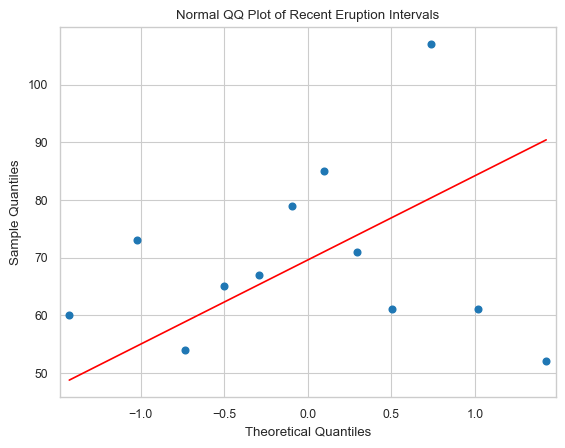

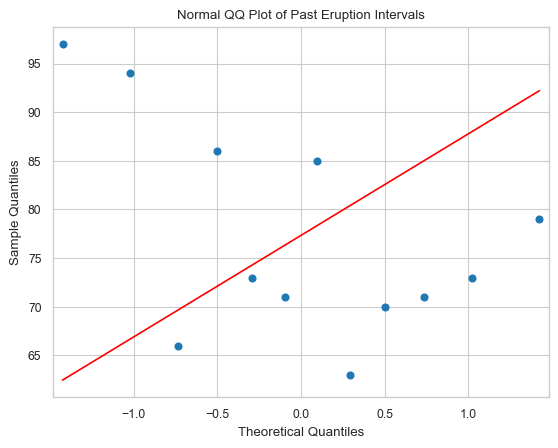

In [414]:
# Create a normal qq plot of the recent eruption intervals
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(recent_df, line='s')
pyplot.title('Normal QQ Plot of Recent Eruption Intervals')
pyplot.show()

# Create a normal qq plot of the past eruption intervals
qqplot(past_df, line='s')
pyplot.title('Normal QQ Plot of Past Eruption Intervals')
pyplot.show()


### 95% Confidence Intervals

In [415]:
# Construct a 95% confidence interval for the difference between the means of the past and recent eruption intervals

# Calculate the mean of the past and recent eruption intervals
mean_recent = recent_df['times'].mean()
mean_past = past_df['times'].mean()

# Calculate the standard deviation of the past and recent eruption intervals
std_recent = recent_df['times'].std()
std_past = past_df['times'].std()

# Calculate the difference between the means of the past and recent eruption intervals
mean_diff = mean_recent - mean_past

# Calculate the standard error of the difference between the means of the past and recent eruption intervals
se_diff = math.sqrt((std_recent ** 2 / len(recent_df)) + (std_past ** 2 / len(past_df)))

# Calculate the margin of error of the difference between the means of the past and recent eruption intervals
moe_diff = se_diff * st.t.ppf((1 + 0.95) / 2, len(recent_df) - 1)

# Calculate the 95% confidence interval of the difference between the means of the past and recent eruption intervals
ci_diff = (mean_diff - moe_diff, mean_diff + moe_diff)

# Print the 95% confidence interval of the difference between the means of the past and recent eruption intervals
print('95% Confidence Interval for the Difference Between the Means of the Past and Recent Eruption Intervals:', ci_diff, '\n')

# Calculate the p-value of the difference between the means of the past and recent eruption intervals
p_value = st.t.sf(abs(mean_diff) / se_diff, len(recent_df) - 1) * 2

# Print the p-value of the difference between the means of the past and recent eruption intervals
print('p-value of the Difference Between the Means of the Past and Recent Eruption Intervals: ', p_value)

95% Confidence Interval for the Difference Between the Means of the Past and Recent Eruption Intervals: (-19.66071049899228, 4.160710498992282) 

p-value of the Difference Between the Means of the Past and Recent Eruption Intervals:  0.1799055943962576


### 99% Confidence Intervals

In [416]:
# Construct a 99% confidence interval for the difference between the means of the past and recent eruption intervals

# Calculate the mean of the past and recent eruption intervals
mean_recent = recent_df['times'].mean()
mean_past = past_df['times'].mean()

# Calculate the standard deviation of the past and recent eruption intervals
std_recent = recent_df['times'].std()
std_past = past_df['times'].std()

# Calculate the difference between the means of the past and recent eruption intervals
mean_diff = mean_recent - mean_past

# Calculate the standard error of the difference between the means of the past and recent eruption intervals
se_diff = math.sqrt((std_recent ** 2 / len(recent_df)) + (std_past ** 2 / len(past_df)))

# Calculate the margin of error of the difference between the means of the past and recent eruption intervals
moe_diff = se_diff * st.t.ppf((1 + 0.99) / 2, len(recent_df) - 1)

# Calculate the 95% confidence interval of the difference between the means of the past and recent eruption intervals
ci_diff = (mean_diff - moe_diff, mean_diff + moe_diff)

# Print the 95% confidence interval of the difference between the means of the past and recent eruption intervals
print('99% Confidence Interval for the Difference Between the Means of the Past and Recent Eruption Intervals:', ci_diff, '\n')

# Calculate the p-value of the difference between the means of the past and recent eruption intervals
p_value = st.t.sf(abs(mean_diff) / se_diff, len(recent_df) - 1) * 2

# Print the p-value of the difference between the means of the past and recent eruption intervals
print('p-value of the Difference Between the Means of the Past and Recent Eruption Intervals: ', p_value)

99% Confidence Interval for the Difference Between the Means of the Past and Recent Eruption Intervals: (-24.557183853737133, 9.057183853737133) 

p-value of the Difference Between the Means of the Past and Recent Eruption Intervals:  0.1799055943962576


### Hypothesis Test

##### Claim: The mean time interval of recent eruptions is not the same as the mean time interval of past eruptions.
Null Hypothesis: The mean time interval of recent eruptions is the same as the mean time interval of past eruptions.  
Alternative Hypothesis: The mean time interval of recent eruptions is not the same as the mean time interval of past eruptions.

H<sub>0</sub>: &mu;<sub>1</sub> - &mu;<sub>2</sub>  = 0  
H<sub>1</sub>: &mu;<sub>1</sub> - &mu;<sub>2 </sub> &ne; 0

In [417]:
# Conduct a two-sample t-test of the difference between the means of the past and recent eruption intervals
alpha = 0.05
t_stat, p_value = st.ttest_ind(recent_df['times'], past_df['times'], equal_var=False)

# Print the t-statistic and p-value of the two-sample t-test of the difference between the means of the past and recent eruption intervals
print('t-statistic: ', t_stat)
print('p-value: ', p_value)
print('alpha: ', alpha)

print('\n')

if p_value < alpha:
    print('Reject the null hypothesis')
    print('There is sufficient evidence to support the claim that the mean time interval of recent eruptions are is the same as the mean time interval of past eruptions')
else:
    print('Fail to reject the null hypothesis')
    print('There is not sufficient evidence to support the claim that the mean time interval of recent eruptions is not the same as the mean time interval of past eruptions')

t-statistic:  -1.4321257318852667
p-value:  0.1676208311930256
alpha:  0.05


Fail to reject the null hypothesis
There is not sufficient evidence to support the claim that the mean time interval of recent eruptions is not the same as the mean time interval of past eruptions


Lower Critical Value: -2.200985160082949
Upper Critical Value: 2.200985160082949


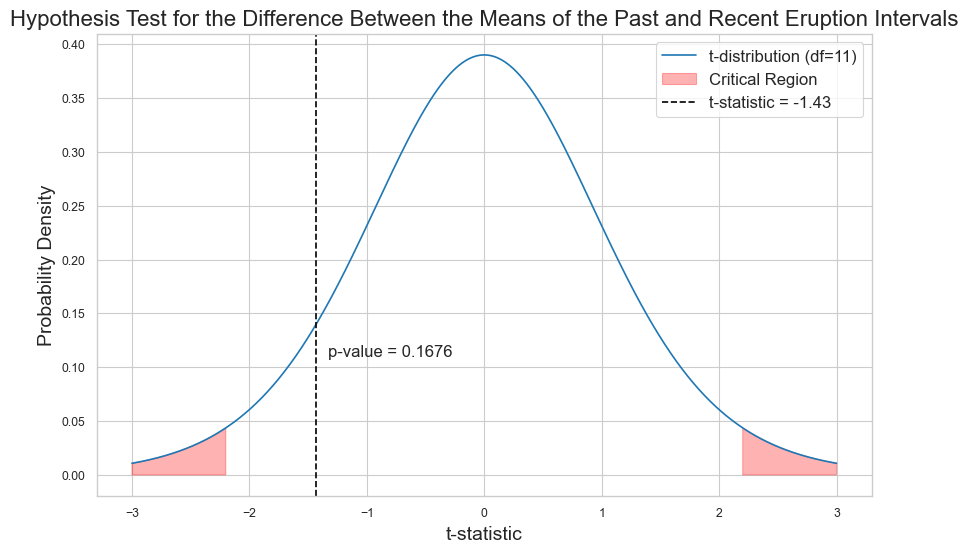

In [418]:
# Create a graph of the hypothesis test
df = len(recent_df) - 1

fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(-3, 3, 1000)
y = st.t.pdf(x, df)
plt.plot(x, y, label='t-distribution (df={})'.format(df))

# Calculate critical values for a two-tailed test

critical_left = st.t.ppf(alpha / 2, df)  
critical_right = -critical_left  

print("Lower Critical Value:", critical_left)
print("Upper Critical Value:", critical_right)

# plot the critical region
plt.fill_between(x, 0, y, where=(x < critical_left) | (x > critical_right), color='red', alpha=0.3, label='Critical Region')

# Plot the t-statistic
plt.axvline(x=t_stat, color='black', linestyle='--', label='t-statistic = {:.2f}'.format(t_stat))

# Plot the p-value
plt.text(x=t_stat + 0.1, y=0.11, s='p-value = {:.4f}'.format(p_value), fontsize=12)

# Add the legend
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('t-statistic', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.title('Hypothesis Test for the Difference Between the Means of the Past and Recent Eruption Intervals', fontsize=16)
plt.show()

In [419]:
# Conduct a two-sample t-test of the difference between the means of the past and recent eruption intervals with alpha = 0.01
alpha1 = 0.01
t_stat, p_value = st.ttest_ind(recent_df['times'], past_df['times'], equal_var=False)

# Print the t-statistic and p-value of the two-sample t-test of the difference between the means of the past and recent eruption intervals
print('t-statistic: ', t_stat)
print('p-value: ', p_value)
print('alpha: ', alpha1)

print('\n')

if p_value < alpha1:
    print('Reject the null hypothesis')
    print('There is sufficient evidence to support the claim that the mean time interval of recent eruptions is not the same as the mean time interval of past eruptions')
else:
    print('Fail to reject the null hypothesis')
    print('There is not sufficient evidence to support the claim that the mean time interval of recent eruptions is not the same as the mean time interval of past eruptions')

t-statistic:  -1.4321257318852667
p-value:  0.1676208311930256
alpha:  0.01


Fail to reject the null hypothesis
There is not sufficient evidence to support the claim that the mean time interval of recent eruptions is not the same as the mean time interval of past eruptions


Lower Critical Value: -3.1058065132211015
Upper Critical Value: 3.1058065132211015


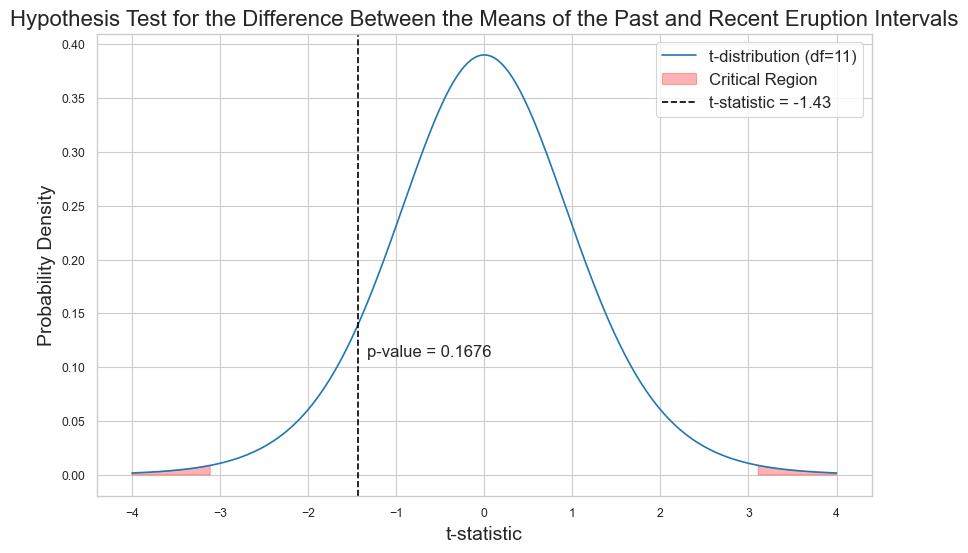

In [420]:
# Create a graph of the hypothesis test
df = len(recent_df) - 1

fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(-4, 4, 1000)
y = st.t.pdf(x, df)
plt.plot(x, y, label='t-distribution (df={})'.format(df))

# Calculate critical values for a two-tailed test

critical_left = st.t.ppf(alpha1 / 2, df)  
critical_right = -critical_left  

print("Lower Critical Value:", critical_left)
print("Upper Critical Value:", critical_right)

# plot the critical region
plt.fill_between(x, 0, y, where=(x < critical_left) | (x > critical_right), color='red', alpha=0.3, label='Critical Region')

# Plot the t-statistic
plt.axvline(x=t_stat, color='black', linestyle='--', label='t-statistic = {:.2f}'.format(t_stat))

# Plot the p-value
plt.text(x=t_stat + 0.1, y=0.11, s='p-value = {:.4f}'.format(p_value), fontsize=12)

# Add the legend
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('t-statistic', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.title('Hypothesis Test for the Difference Between the Means of the Past and Recent Eruption Intervals', fontsize=16)
plt.show()

## Investigate the effect of any outlier 

#### Identify and remove outliers


In [421]:
# Identify the outliers in the recent eruption intervals
outliers_recent = recent_df[(recent_df['times'] < (statistics_recent.loc['25%', 'times'] - 1.5 * iqr_recent)) | (recent_df['times'] > (statistics_recent.loc['75%', 'times'] + 1.5 * iqr_recent))]
print('Outliers in Recent Eruption Intervals:\n')
print(outliers_recent, '\n')

# Identify the outliers in the past eruption intervals
outliers_past = past_df[(past_df['times'] < (statistics_past.loc['25%', 'times'] - 1.5 * iqr_past)) | (past_df['times'] > (statistics_past.loc['75%', 'times'] + 1.5 * iqr_past))]
print('Outliers in Past Eruption Intervals:\n')
print(outliers_past)

Outliers in Recent Eruption Intervals:

   times
9    107 

Outliers in Past Eruption Intervals:

Empty DataFrame
Columns: [times]
Index: []


In [422]:
# remove outliers from the recent eruption intervals
recent_df2 = recent_df[(recent_df['times'] > (statistics_recent.loc['25%', 'times'] - 1.5 * iqr_recent)) & (recent_df['times'] < (statistics_recent.loc['75%', 'times'] + 1.5 * iqr_recent))]

# Print the summary statistics of the recent and past eruption intervals without outliers
statistics_recent2 = recent_df2[['times']].describe()
print('Summary Statistics for Recent Eruption Intervals Without Outliers\n')
print(statistics_recent2, '\n')

# remove outliers from the past eruption intervals
past_df2 = past_df[(past_df['times'] > (statistics_past.loc['25%', 'times'] - 1.5 * iqr_past)) & (past_df['times'] < (statistics_past.loc['75%', 'times'] + 1.5 * iqr_past))]
statistics_past2 = past_df2[['times']].describe()
print('Summary Statistics for Past Eruption Intervals Without Outliers\n')
print(statistics_past2)

Summary Statistics for Recent Eruption Intervals Without Outliers

           times
count  11.000000
mean   66.181818
std    10.156950
min    52.000000
25%    60.500000
50%    65.000000
75%    72.000000
max    85.000000 

Summary Statistics for Past Eruption Intervals Without Outliers

           times
count  12.000000
mean   77.333333
std    10.898985
min    63.000000
25%    70.750000
50%    73.000000
75%    85.250000
max    97.000000


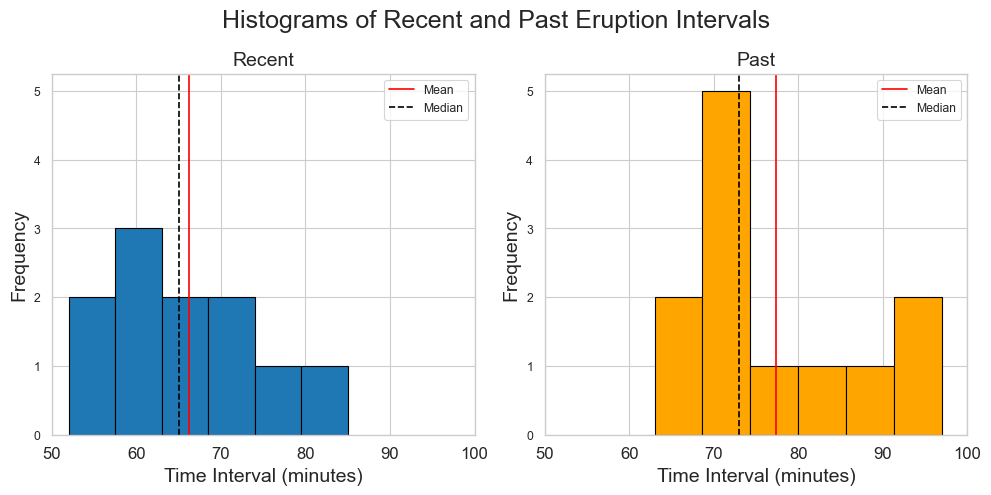

In [423]:
# Create histogram of the recent and past eruption intervals
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Histograms of Recent and Past Eruption Intervals', fontsize=18)

ax1 = fig.add_subplot(1, 2, 1)  
ax1.hist(recent_df2['times'], bins=6, edgecolor='black')
ax1.set_ylabel('Frequency', fontsize=14)
ax1.set_title('Recent', fontsize=14)
ax1.set_xlabel('Time Interval (minutes)', fontsize=14)
ax1.axline((recent_df2['times'].mean(), 0), (recent_df2['times'].mean(), 5), color='red', linestyle='-')
ax1.axline((recent_df2['times'].median(), 0), (recent_df2['times'].median(), 5), color='black', linestyle='--')
ax1.set_xticks([50, 60, 70, 80, 90, 100])
ax1.set_xticklabels([50, 60, 70, 80, 90, 100], fontsize=12)
ax1.legend(['Mean', 'Median'])

ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(past_df['times'], bins=6, color='orange', edgecolor='black')
ax2.set_ylabel('Frequency', fontsize=14)
ax2.set_title('Past', fontsize=14)
ax2.set_xlabel('Time Interval (minutes)', fontsize=14)
ax2.axline((past_df2['times'].mean(), 0), (past_df2['times'].mean(), 5), color='red', linestyle='-')
ax2.axline((past_df2['times'].median(), 0), (past_df2['times'].median(), 5), color='black', linestyle='--')
ax2.set_xticks([50, 60, 70, 80, 90, 100])
ax2.set_xticklabels([50, 60, 70, 80, 90, 100], fontsize=12)
ax2.legend(['Mean', 'Median'])

plt.tight_layout()
plt.show()

### Normality Testing using skewness and QQ Plot with outlier removed

In [424]:
# Create a function to classify the skewness
def classify_skewness(data):
    """
    Classify the skewness of a dataset into three categories.

    Parameters:
    data (array-like): The input data for which skewness is to be calculated.

    Returns:
    str: A string indicating the skewness category.
    """
    skew_value = st.skew(data)

    if -0.5 <= skew_value <= 0.5:
        return "Nearly symmetrical"
    elif (-1 <= skew_value < -0.5) or (0.5 <= skew_value <= 1):
        return "Slightly skewed"
    else:
        return "Extremely skewed"


# Classify the skewness of the recent and past eruption intervals
print('Resent Eruption Intervals')
print('Skewness: ', st.skew(recent_df2), classify_skewness(recent_df2), '\n')
print('Past Eruption Intervals')
print('Skewness: ', st.skew(past_df2), classify_skewness(past_df2))

Resent Eruption Intervals
Skewness:  [0.40269895] Nearly symmetrical 

Past Eruption Intervals
Skewness:  [0.57769436] Slightly skewed


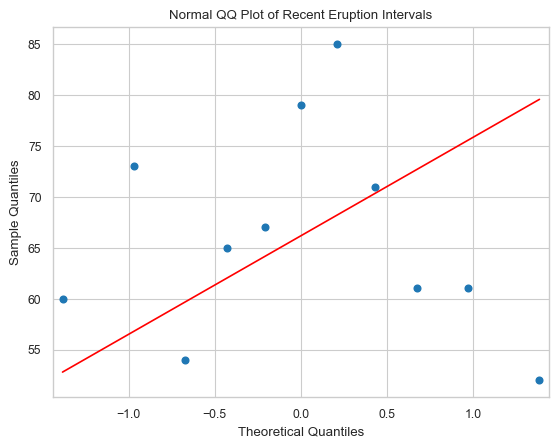

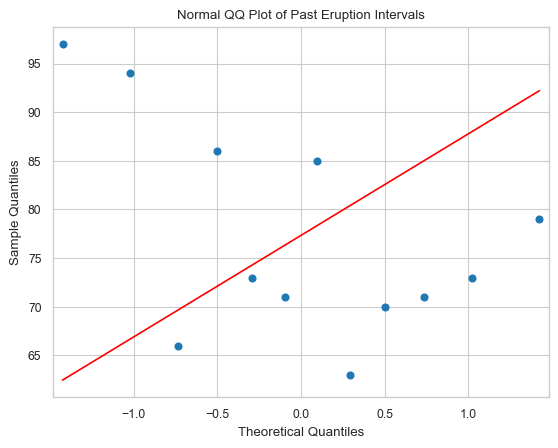

In [425]:
# Create a normal qq plot of the recent eruption intervals
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(recent_df2, line='s')
pyplot.title('Normal QQ Plot of Recent Eruption Intervals')
pyplot.show()

# Create a normal qq plot of the past eruption intervals
qqplot(past_df2, line='s')
pyplot.title('Normal QQ Plot of Past Eruption Intervals')
pyplot.show()

### 95% Confidence Intervals with outlier removed

In [426]:
# Construct a 95% confidence interval for the difference between the means of the past and recent eruption intervals

# Calculate the mean of the past and recent eruption intervals
mean_recent2 = recent_df2['times'].mean()
mean_past2 = past_df2['times'].mean()

# Calculate the standard deviation of the past and recent eruption intervals
std_recent2 = recent_df2['times'].std()
std_past2 = past_df2['times'].std()

# Calculate the difference between the means of the past and recent eruption intervals
mean_diff2 = mean_recent2 - mean_past2

# Calculate the standard error of the difference between the means of the past and recent eruption intervals
se_diff2 = math.sqrt((std_recent2 ** 2 / len(recent_df2)) + (std_past2 ** 2 / len(past_df2)))

# Calculate the margin of error of the difference between the means of the past and recent eruption intervals
moe_diff2 = se_diff2 * st.t.ppf((1 + 0.95) / 2, len(recent_df2) - 1)

# Calculate the 95% confidence interval of the difference between the means of the past and recent eruption intervals
ci_diff2 = (mean_diff2 - moe_diff2, mean_diff2 + moe_diff2)

# Print the 95% confidence interval of the difference between the means of the past and recent eruption intervals
print('95% Confidence Interval for the Difference Between the Means of the Past and Recent Eruption Intervals:', ci_diff2, '\n')

# Calculate the p-value of the difference between the means of the past and recent eruption intervals
p_value2 = st.t.sf(abs(mean_diff2) / se_diff2, len(recent_df2) - 1) * 2

# Print the p-value of the difference between the means of the past and recent eruption intervals
print('p-value of the Difference Between the Means of the Past and Recent Eruption Intervals: ', p_value2)

95% Confidence Interval for the Difference Between the Means of the Past and Recent Eruption Intervals: (-20.9344155796906, -1.3686147233396841) 

p-value of the Difference Between the Means of the Past and Recent Eruption Intervals:  0.029370579625260698


In [427]:

# Construct a 99% confidence interval for the difference between the means of the past and recent eruption intervals

# Calculate the mean of the past and recent eruption intervals
mean_recent2 = recent_df2['times'].mean()
mean_past2 = past_df2['times'].mean()

# Calculate the standard deviation of the past and recent eruption intervals
std_recent2 = recent_df2['times'].std()
std_past2 = past_df2['times'].std()

# Calculate the difference between the means of the past and recent eruption intervals
mean_diff2 = mean_recent2 - mean_past2

# Calculate the standard error of the difference between the means of the past and recent eruption intervals
se_diff2 = math.sqrt((std_recent2 ** 2 / len(recent_df2)) + (std_past2 ** 2 / len(past_df2)))

# Calculate the margin of error of the difference between the means of the past and recent eruption intervals
moe_diff2 = se_diff2 * st.t.ppf((1 + 0.99) / 2, len(recent_df2) - 1)

# Calculate the 95% confidence interval of the difference between the means of the past and recent eruption intervals
ci_diff2 = (mean_diff2 - moe_diff2, mean_diff2 + moe_diff2)

# Print the 95% confidence interval of the difference between the means of the past and recent eruption intervals
print('99% Confidence Interval for the Difference Between the Means of the Past and Recent Eruption Intervals:', ci_diff2, '\n')

# Calculate the p-value of the difference between the means of the past and recent eruption intervals
p_value2 = st.t.sf(abs(mean_diff2) / se_diff2, len(recent_df2) - 1) * 2

# Print the p-value of the difference between the means of the past and recent eruption intervals
print('p-value of the Difference Between the Means of the Past and Recent Eruption Intervals: ', p_value2)

99% Confidence Interval for the Difference Between the Means of the Past and Recent Eruption Intervals: (-25.06657206342036, 2.763541760390078) 

p-value of the Difference Between the Means of the Past and Recent Eruption Intervals:  0.029370579625260698


### Hypothesis Test with outlier removed

##### Claim: The mean time interval of recent eruptions is not the same as the mean time interval of past eruptions.
Null Hypothesis: The mean time interval of recent eruptions is the same as the mean time interval of past eruptions.  
Alternative Hypothesis: The mean time interval of recent eruptions is not the same as the mean time interval of past eruptions.

H<sub>0</sub>: &mu;<sub>1</sub> - &mu;<sub>2</sub>  = 0  
H<sub>1</sub>: &mu;<sub>1</sub> - &mu;<sub>2 </sub> &ne; 0

In [428]:
# Conduct a two-sample t-test of the difference between the means of the past and recent eruption intervals
alpha = 0.05
t_stat2, p_value2 = st.ttest_ind(recent_df2['times'], past_df2['times'], equal_var=False)

# Print the t-statistic and p-value of the two-sample t-test of the difference between the means of the past and recent eruption intervals
print('t-statistic: ', t_stat2)
print('p-value: ', p_value2)
print('alpha: ', alpha)

print('\n')

if p_value2 < alpha:
    print('Reject the null hypothesis')
    print('There is sufficient evidence to support the claim that the mean time interval of recent eruptions are not the same as the mean time interval of past eruptions')
else:
    print('Fail to reject the null hypothesis')
    print('There is not sufficient evidence to support the claim that the mean time interval of recent eruptions are not the same as the mean time interval of past eruptions')

t-statistic:  -2.539852505889261
p-value:  0.01906323973138533
alpha:  0.05


Reject the null hypothesis
There is sufficient evidence to support the claim that the mean time interval of recent eruptions are not the same as the mean time interval of past eruptions


Lower Critical Value: -2.0796138447276626
Upper Critical Value: 2.0796138447276626


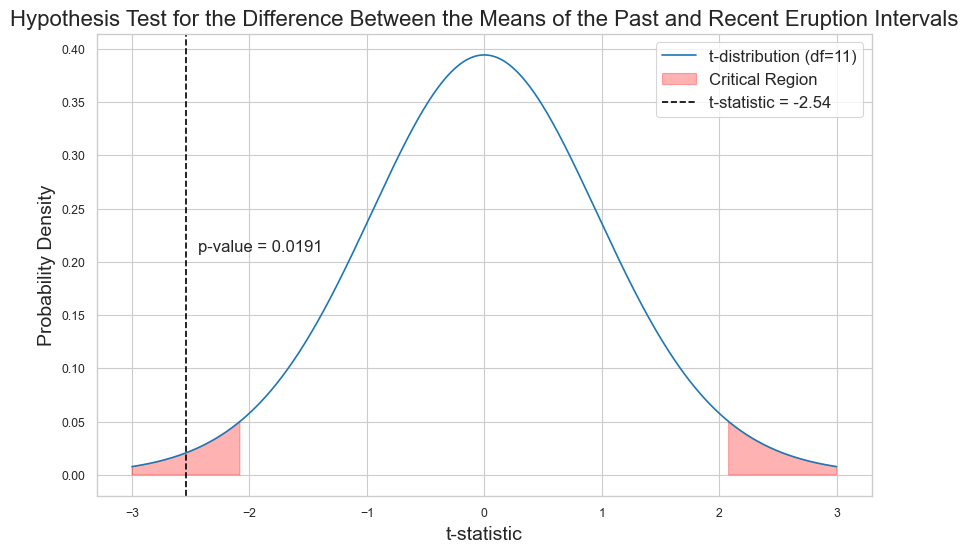

In [429]:
# Create a graph of the hypothesis test
df2 = len(recent_df2) + len(past_df2) - 2

fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(-3, 3, 1000)
y = st.t.pdf(x, df2)
plt.plot(x, y, label='t-distribution (df={})'.format(df))

# Calculate critical values for a two-tailed test

critical_left2 = st.t.ppf(alpha / 2, df2)  
critical_right2 = -critical_left2  

print("Lower Critical Value:", critical_left2)
print("Upper Critical Value:", critical_right2)

# plot the critical region
plt.fill_between(x, 0, y, where=(x < critical_left2) | (x > critical_right2), color='red', alpha=0.3, label='Critical Region')

# Plot the t-statistic
plt.axvline(x=t_stat2, color='black', linestyle='--', label='t-statistic = {:.2f}'.format(t_stat2))

# Plot the p-value
plt.text(x=t_stat2 + 0.1, y=0.21, s='p-value = {:.4f}'.format(p_value2), fontsize=12)

# Add the legend
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('t-statistic', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.title('Hypothesis Test for the Difference Between the Means of the Past and Recent Eruption Intervals', fontsize=16)
plt.show()

In [430]:
# Conduct a two-sample t-test of the difference between the means of the past and recent eruption intervals
alpha1 = 0.01
t_stat2, p_value2 = st.ttest_ind(recent_df2['times'], past_df2['times'], equal_var=False)

# Print the t-statistic and p-value of the two-sample t-test of the difference between the means of the past and recent eruption intervals
print('t-statistic: ', t_stat2)
print('p-value: ', p_value2)
print('alpha: ', alpha1)

print('\n')

if p_value < alpha1:
    print('Reject the null hypothesis')
    print('There is sufficient evidence to support the claim that the mean time interval of recent eruptions are not the same as the mean time interval of past eruptions')
else:
    print('Fail to reject the null hypothesis')
    print('There is not sufficient evidence to support the claim that the mean time interval of recent eruptions are not the same as the mean time interval of past eruptions')

t-statistic:  -2.539852505889261
p-value:  0.01906323973138533
alpha:  0.01


Fail to reject the null hypothesis
There is not sufficient evidence to support the claim that the mean time interval of recent eruptions are not the same as the mean time interval of past eruptions


Lower Critical Value: -2.8313595580171866
Upper Critical Value: 2.8313595580171866


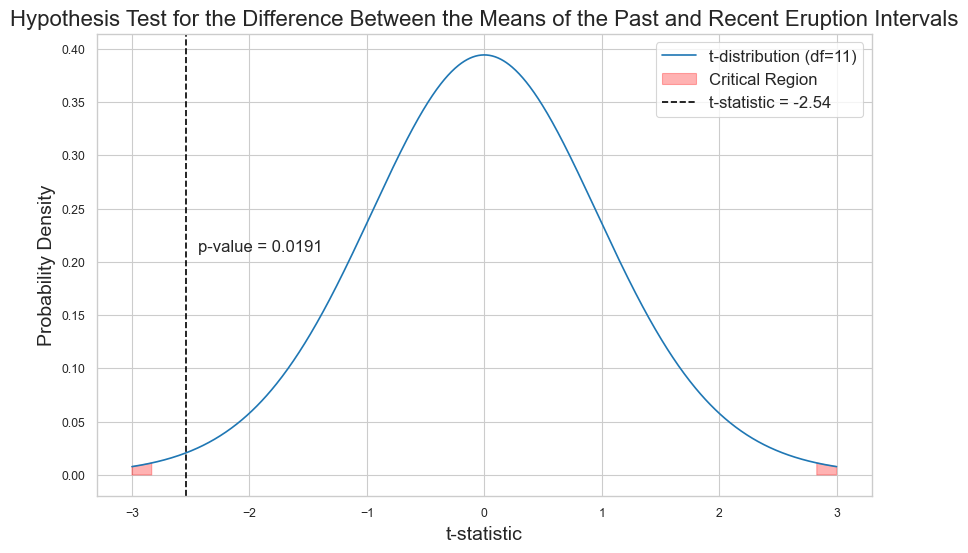

In [431]:
# Create a graph of the hypothesis test
df2 = len(recent_df2) + len(past_df2) - 2

fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(-3, 3, 1000)
y = st.t.pdf(x, df2)
plt.plot(x, y, label='t-distribution (df={})'.format(df))

# Calculate critical values for a two-tailed test

critical_left2 = st.t.ppf(alpha1 / 2, df2)  
critical_right2 = -critical_left2  

print("Lower Critical Value:", critical_left2)
print("Upper Critical Value:", critical_right2)

# plot the critical region
plt.fill_between(x, 0, y, where=(x < critical_left2) | (x > critical_right2), color='red', alpha=0.3, label='Critical Region')

# Plot the t-statistic
plt.axvline(x=t_stat2, color='black', linestyle='--', label='t-statistic = {:.2f}'.format(t_stat2))

# Plot the p-value
plt.text(x=t_stat2 + 0.1, y=0.21, s='p-value = {:.4f}'.format(p_value2), fontsize=12)

# Add the legend
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('t-statistic', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.title('Hypothesis Test for the Difference Between the Means of the Past and Recent Eruption Intervals', fontsize=16)
plt.show()